<a href="https://colab.research.google.com/github/harita-gr/AI_ML_Practice/blob/main/ICT_AI_ML_LS_7_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/Advertising.csv");

In [ ]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Dropping unnamed:0 column

In [ ]:
data.drop("Unnamed: 0", axis = 1, inplace = True)

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Check for missing values

In [ ]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Check for outliers

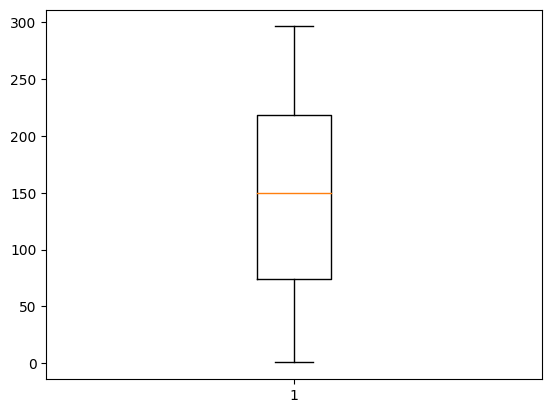

In [ ]:
plt.boxplot(data['TV'])
plt.show()

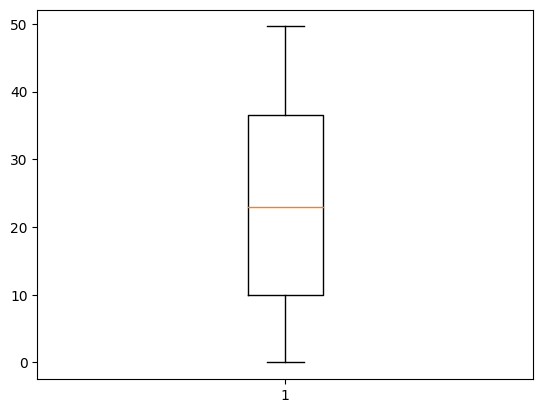

In [ ]:
plt.boxplot(data['Radio'])
plt.show()

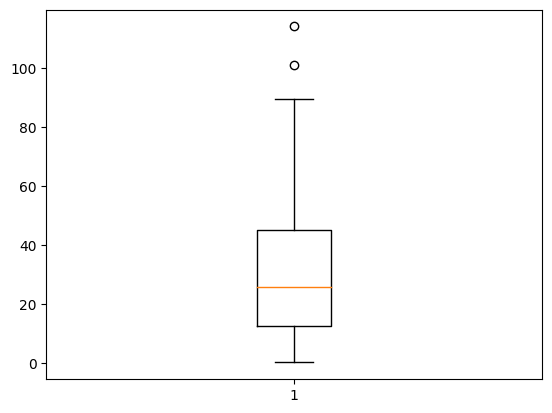

In [ ]:
plt.boxplot(data['Newspaper'])
plt.show()

#has 2 outliers

Check Distribution

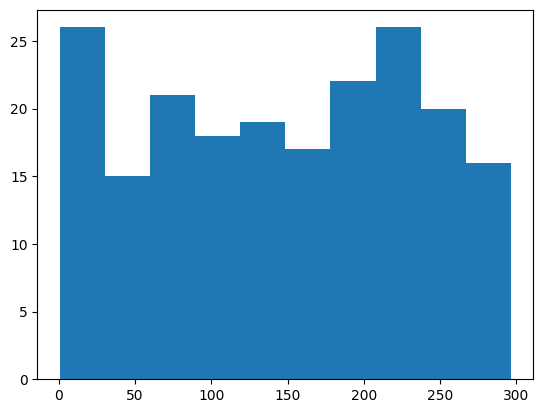

In [ ]:
plt.hist(data['TV'])
plt.show()
#not normally distributed

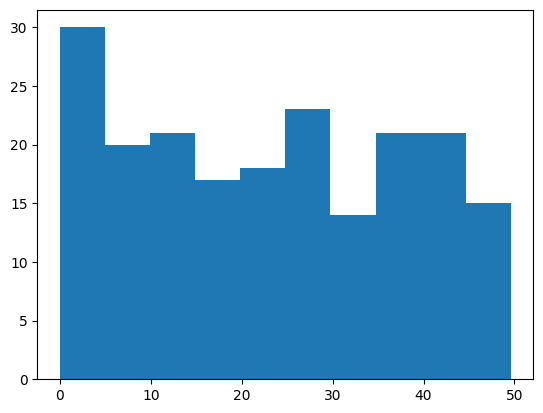

In [ ]:
plt.hist(data['Radio'])
plt.show()
#positively skewed

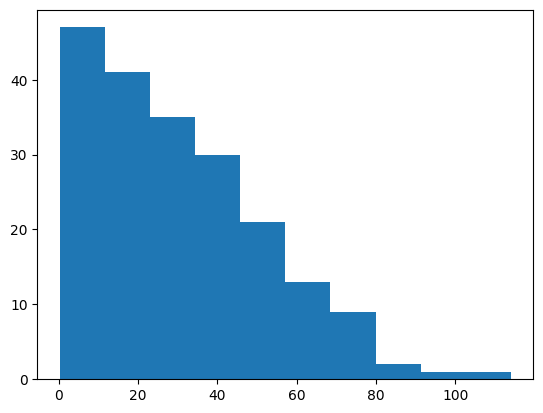

In [ ]:
plt.hist(data['Newspaper'])
plt.show()
#positively skewed

Correlation between fields

In [ ]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


TV and TV => Very corrleated

<Axes: >

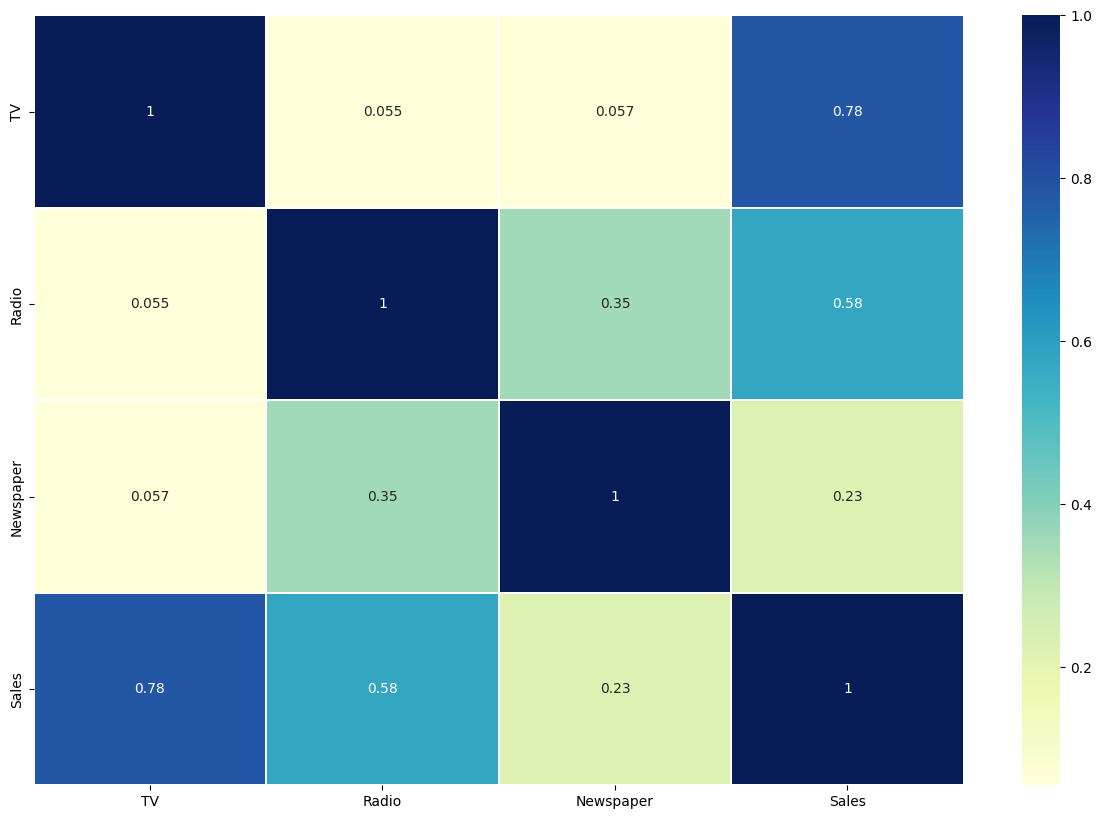

In [ ]:
corrmatrix = data.corr()
plt.subplots(figsize=(15,10)) #increase size of plot
sns.heatmap(corrmatrix, annot = True, cmap = 'YlGnBu', linewidth = 0.2)

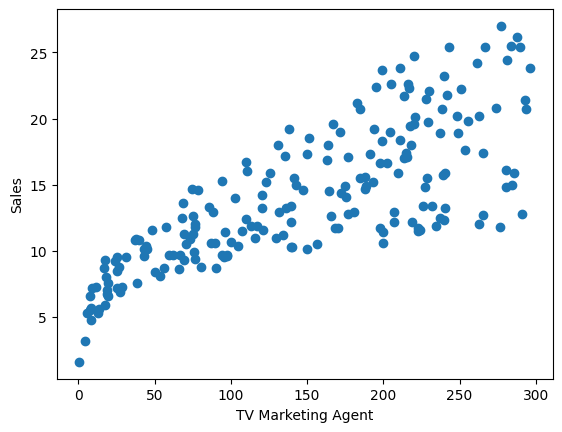

In [ ]:
plt.scatter(data['TV'],data['Sales'])
plt.xlabel("TV Marketing Agent")
plt.ylabel("Sales")
plt.show()
#highly correlated

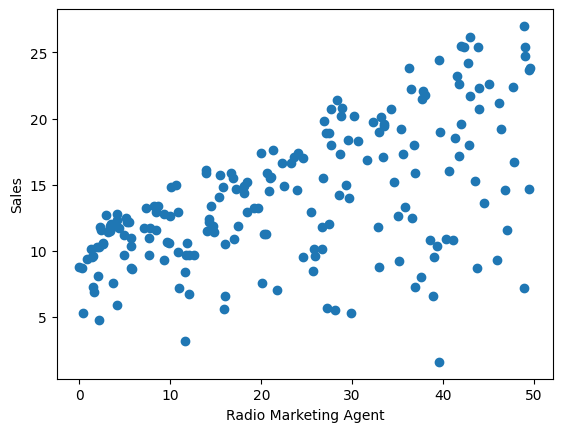

In [ ]:
plt.scatter(data['Radio'],data['Sales'])
plt.xlabel("Radio Marketing Agent")
plt.ylabel("Sales")
plt.show()
#not that correlated compared to TV

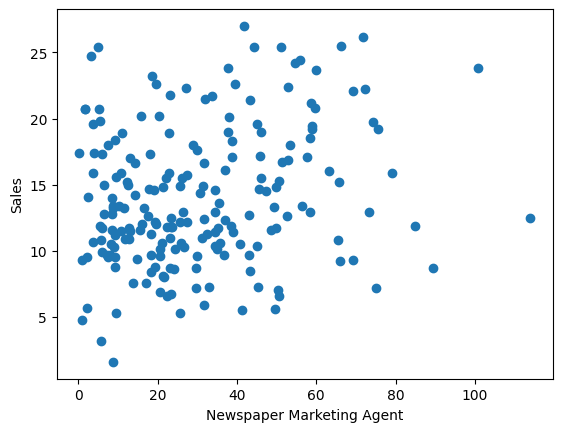

In [ ]:
plt.scatter(data['Newspaper'],data['Sales'])
plt.xlabel("Newspaper Marketing Agent")
plt.ylabel("Sales")
plt.show()
#not that correlated

Sales - dependent feature (Y)
TV, Radio, Newspaper - independent feature (X)

In [ ]:
x = data[['TV','Radio','Newspaper']]
y = data['Sales']

Split data to train and test.
Take some data for training. Some for testing. (70:30, 80:20) etc.

In [ ]:
from sklearn.model_selection import train_test_split

`test_size = 0.2`
Take 20% for testing. 80% for training

`random_state = 42`
the 80% or 20% values are chosen randomly. Defined to get same random values (indexes) for everytime.


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [ ]:
x_train

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [ ]:
y_train

79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: Sales, Length: 160, dtype: float64

In [ ]:
x_test

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [ ]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64

Training Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test,y_pred)

In [ ]:
print(mse)

3.1740973539761033


If MSE Is closer to 0 => Good model

In [ ]:
r2_score(y_test,y_pred)

0.899438024100912

Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
x.loc[:,['TV','Radio','Newspaper']] = sc.fit_transform(x[['TV','Radio','Newspaper']])

<ipython-input-49-0ef5b3527c80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:,['TV','Radio','Newspaper']] = sc.fit_transform(x[['TV','Radio','Newspaper']])


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred1 = lr.predict(x_test)

In [ ]:
y_pred1

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])